In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('data/googleplaystore.csv')

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
print("--- Data Info ---")
df.info()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [25]:
print("\n--- Statistical Summary ---")
df.describe()


--- Statistical Summary ---


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [27]:
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [29]:
df.dropna(inplace=True)

In [31]:
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [35]:
df = df[df['Rating'] <= 5]
print(f"Max Rating: {df['Rating'].max()}")

Max Rating: 5.0


In [37]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '').replace(',', ''))
df['Installs'] = df['Installs'].astype(int)

df['Price'] = df['Price'].apply(lambda x: x.replace('$', ''))
df['Price'] = df['Price'].astype(float)

print(df[['Installs', 'Price']].dtypes)

Installs      int64
Price       float64
dtype: object


In [39]:
def convert_size(size_val):
    size_val = str(size_val)
    if 'M' in size_val:
        return float(size_val.replace('M', ''))
    elif 'k' in size_val:
        return float(size_val.replace('k', '')) / 1024
    else:
        return np.nan

# Fonksiyonu uygula
df['Size'] = df['Size'].apply(convert_size)

# Kontrol: Ortalama uygulama boyutu kaç MB?
print(f"Average App Size: {df['Size'].mean():.2f} MB")

Average App Size: 22.97 MB


Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)

/var/folders/nt/zv6d46815b59c7j2j2ry2sk00000gn/T/ipykernel_54268/3838195753.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


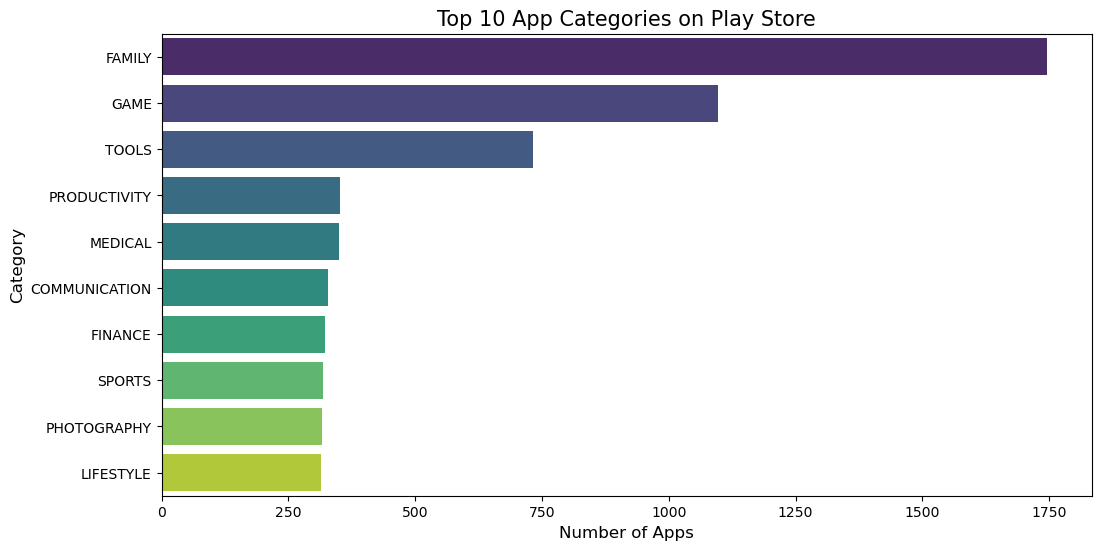

In [49]:
# Kategorilere göre uygulama sayısı hesaplama
category_counts = df['Category'].value_counts().head(10) # En popüler 10 kategoriyi al

# Görselleştirme için figür boyutunu ayarlama
plt.figure(figsize=(12, 6))

# Seaborn ile bar plot çizimi
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')

# Başlık ve etiketleri ekleme
plt.title('Top 10 App Categories on Play Store', fontsize=15)
plt.xlabel('Number of Apps', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Grafiği gösterimi
plt.show()

/var/folders/nt/zv6d46815b59c7j2j2ry2sk00000gn/T/ipykernel_54268/1218161688.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Rating', data=df, palette='Set2')


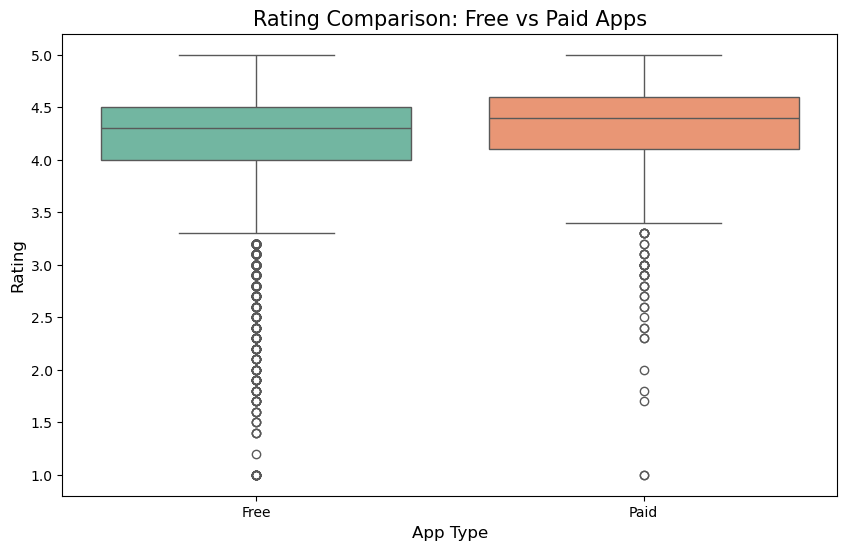

In [52]:
plt.figure(figsize=(10, 6))

# Type sütununda 'Paid' ve 'Free' değerleri var
sns.boxplot(x='Type', y='Rating', data=df, palette='Set2')

plt.title('Rating Comparison: Free vs Paid Apps', fontsize=15)
plt.xlabel('App Type', fontsize=12)
plt.ylabel('Rating', fontsize=12)

plt.show()